# Exercise One
### 1. Implement this algorithm in Python. Use the NumPy ndarray object for your matrices;

In [7]:
import numpy as np

def square_matrix_multiply(A, B):
    n = len(A)
    C = [[0] * n for row in range(n)] # Initialize result matrix C

    for i in range(n):  # Iterate through rows of A
        for j in range(n):  # Iterate through columns of B
            for k in range(n):  # Iterate through elements of rows of A and columns of B
                C[i][j] += A[i][k] * B[k][j]  # Compute the product and accumulate it in C

    return C

In [8]:
# Example usage:
A = np.array([[2,4],[0,5]])
B = np.array([[3, 2],[1,6]])

result = square_matrix_multiply(A, B)
print(result)  

[[10, 28], [5, 30]]


### 2. Give the asymptotic time complexity of the above algorithm or your implementation (they should be the same). Justify and explain your answer.**

I think the asymptotic time complexity of the matrix multiplication algorithm above is 
O(n^3).

'for i = 1 to n do'----------n times;

'for j = 1 to n do'----------n times;

'cij = 0 for k=1 to n do'----------n times;

' cij = cij + aik × bkj'----------n times;

So, O(n * n * n * n) = O(n^3)

### 3. Implement the algorithm with nested lists and compare the algorithms on different sizes of matrices;

### 4. Compare with built-in multiplication functions;

In [9]:
#To compare the algorithms on different sizes of matrices, 
#we can generate random matrices of varying sizes 
#and measure the time taken by each algorithm to multiply them

import time

# create a function to generate a random matrix of size n x n
def generate_random_matrix(n):
    return [[np.random.randint(20) for _ in range(n)] for _ in range(n)]

#create different size of matrices to compare
sizes = [50, 100, 200]
for size in sizes:
    A = generate_random_matrix(size)
    B = generate_random_matrix(size)
    
    #Measure time with built-in multiplication functions
    start_time = time.time()
    np_result = np.dot(A, B) # np.dot(A, B) used for list; A@B used for Numpy arrays
    numpy_time = time.time() - start_time

    # Measure time for nested list implementation
    start_time = time.time()
    list_result = square_matrix_multiply(A, B)
    list_time = time.time() - start_time
    
    print(f"Matrix size: {size}x{size}")
    print(f"NumPy time: {numpy_time:.3f} s")
    print(f"Nested list time: {list_time:.3f} s")
    print()

Matrix size: 50x50
NumPy time: 0.000 s
Nested list time: 0.011 s

Matrix size: 100x100
NumPy time: 0.000 s
Nested list time: 0.112 s

Matrix size: 200x200
NumPy time: 0.007 s
Nested list time: 0.886 s



### 5. Look at multiplying more than two matrices, or at other operations on matrices.

In [10]:
# multiplying three matrices:

def multiply_matrices(*matrices):
    result = matrices[0]
    for matrix in matrices[1:]:
        result = square_matrix_multiply(result, matrix)
    return result

In [29]:
# Example usage:
A = [[2, 1, 13], [11, 3, 12], [6, 0, 10]]
B = [[8, 2, 18], [17, 4, 10], [14, 10, 9]]
C = [[15, 10, 0], [1, 9, 0], [19, 18, 18]]

list_result = multiply_matrices(A, B, C)
print(list_result)

print()
np_result = np.dot(np.dot(A, B), C) 
print(np_result)

[[6460, 6326, 2934], [11143, 10504, 6048], [6694, 6452, 3564]]

[[ 6460  6326  2934]
 [11143 10504  6048]
 [ 6694  6452  3564]]


# Exercise Two
### 1. Describe and explain the algorithm. It should contain at least the following:

This algorithm, Square-Matrix-Multiply-Recursive (SMMRec), is a recursive implementation of matrix multiplication. 

1. "SMMRec(A,B):": accepts two matrices A and B as input.
2. "n = nr of rows of A": Define a variable n which is equal to the number of rows of A, also the size of A.
3. "let C be a new n × n matrix": Create a new square C with the same dimensions as A and B.
4. "if n == 1 then":If the size of the matrix is 1 × 1, the following operations are performed; otherwise, the chunked multiplication of the matrix is performed.
5. "quarter matrices A, B, and C":Divide the matrices A, B and C into four equal-sized sub-matrices.
6. "C11 = SMMRec(A11,B11) + SMMRec(A12,B21)""C12 = SMMRec(A11,B12) + SMMRec(A12,B22)""C21 = SMMRec(A21,B11) + SMMRec(A22,B21)""C22 = SMMRec(A21,B12) + SMMRec(A22,B22)": Calculate the value of C11 C12 C21 C22 separately.

**recursiveness:**
The base case of the recursion is when the size of the matrices becomes 1 × 1, the algorithm computes the product directly without further recursion.And in each recursion step, the algorithm divides the input matrices into four equal-sized submatrices. It then recursively multiplies these submatrices until the base case is reached, where it computes the product directly.

**divide-and-conquer:**
1. **Divide**:The algorithm divides the input matrices A, B, and C into four equal-sized submatrices.
2. **Conquer**: It recursively multiplies these submatrices. Each multiplication involves recursively calling the SMMRec function until the base case is reached, and then directly computing the product.
3. **Combine**: After computing the products of submatrices, the algorithm combines them to form the final result matrix C. The combination involves adding or summing the products of corresponding submatrices to form the corresponding submatrices of C.

### 2. Implement the recursive algorithm in Python. Reflect on which steps of the pseudocode were straightforward to implement and which hid a lot of complexity behind their language.

In [11]:
def split_matrix(A):
    mid = len(A) // 2
    A11 = [row[:mid] for row in A[:mid]]
    A12 = [row[mid:] for row in A[:mid]]
    A21 = [row[:mid] for row in A[mid:]]
    A22 = [row[mid:] for row in A[mid:]]
    return A11, A12, A21, A22

def combine_matrices(C11, C12, C21, C22):
    n = len(C11)
    C = [[0 for _ in range(2 * n)] for _ in range(2 * n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = C11[i][j]
            C[i][j + n] = C12[i][j]
            C[i + n][j] = C21[i][j]
            C[i + n][j + n] = C22[i][j]
    return C

def matrix_add(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A))] for i in range(len(A))]

def SMMRec(A, B):
    n = len(A)
    if n == 1:
        # Base case: direct multiplication of 1x1 matrices
        return [[A[0][0] * B[0][0]]]  
    else:
        # Split matrices into quarters
        A11, A12, A21, A22 = split_matrix(A)
        B11, B12, B21, B22 = split_matrix(B)

        # Recursive calls to compute submatrix products
        C11 = matrix_add(SMMRec(A11, B11), SMMRec(A12, B21))
        C12 = matrix_add(SMMRec(A11, B12), SMMRec(A12, B22))
        C21 = matrix_add(SMMRec(A21, B11), SMMRec(A22, B21))
        C22 = matrix_add(SMMRec(A21, B12), SMMRec(A22, B22))

        # Combine submatrix products into result matrix
        return combine_matrices(C11, C12, C21, C22)

In [57]:
# Example usage:
A = [[9, 7, 10, 12], [8, 17, 2, 2], [13, 7, 15, 19], [19, 13, 2, 12]]
B = [[15, 0, 13, 3], [7, 18, 16, 16], [19, 14, 16, 2], [15, 8, 8, 5]]

C = SMMRec(A, B)
print("SMMRec result:\n", C, "\n")

np_result = np.dot(A, B) # Check if the results of SMMRec are correct
print("np result:\n", np_result)

SMMRec result:
 [[554, 362, 485, 219], [307, 350, 424, 310], [814, 488, 673, 276], [594, 358, 583, 329]] 

np result:
 [[554 362 485 219]
 [307 350 424 310]
 [814 488 673 276]
 [594 358 583 329]]


**Straightforward Steps:**
Base case, splitting matrices and combining matrices are some straightforward steps.

**Steps with Complexity:**
1. matrix addition: Matrix addition involves iterating over corresponding elements of the matrices and adding them together. In the matrix_add() function, we iterate over the rows and columns of the matrices, accessing corresponding elements and adding them together.
2. recursive call: Complexity is managing indices to access elements of matrices correctly. In the pseudocode, the algorithm computes the product of submatrices by performing addition and multiplication on their corresponding elements.

### 3. Do a complexity analysis for the SMMRec algorithm. First comment on the complexity of the base case, divide step, conquer step, and combine step separately, then put it all together.

**Base case** B(n):
O(1) because it involves a simple multiplication operation between two scalars.

**Divide** D(n)：
The divide step involves splitting the input matrices into quarters. Since this step involves iterating over all elements of the matrices, its time complexity is O(n^2)

**Conquer** R(n)：
The conquer step involves recursively multiplying submatrices until the base case is reached. The size of the matrices reduces by half in each recursive call.  Then in each recursive call, the size reduces to n/2. Therefore, the recursive conquer step has a complexity of T(n/2).

**Combine** C(n):
This step requires iterating over each element of the result matrix and copying or summing the corresponding elements from the submatrix products. Its time complexity is O(n^2).

**Overall**:
Overall time complexity: 
if base case: T(n) = O(1);
else: O(n^2) + T(n/2) + O(n^2)

### 4. Do a tree analysis;

In [ ]:
                         (n x n)
                        /   |   \
                       /    |    \
                 (n/2 x n/2) ... (n/2 x n/2) ...
                /   |   \         /    |    \
               /    |    \       /     |     \
        (n/4 x n/4) ...   ... (n/4 x n/4) ...
          / | \                        / | \
         /  |  \                      /  |  \
   (1 x 1) ... ...               (1 x 1) ... ...

### 5. Test and compare the practical speed with the non-recursive algorithm

In [29]:
# Test and compare the algorithms
sizes = [16,64,128]  # Different sizes of matrices to test
for size in sizes:
    A = generate_random_matrix(size)
    B = generate_random_matrix(size)
    
    # Measure time for recursive algorithm
    start_time = time.time()
    result_recursive = SMMRec(A, B)
    recursive_time = time.time() - start_time

    # Measure time for non-recursive algorithm (for comparison)
    start_time = time.time()
    result_non_recursive = np.dot(A, B)
    non_recursive_time = time.time() - start_time

    print(f"Matrix size: {size}x{size}")
    print(f"Recursive time: {recursive_time:.3f} s")
    print(f"Non-recursive time: {non_recursive_time:.3f} s")
    print()

Matrix size: 16x16
Recursive time: 0.010 s
Non-recursive time: 0.000 s

Matrix size: 64x64
Recursive time: 0.335 s
Non-recursive time: 0.000 s

Matrix size: 128x128
Recursive time: 2.818 s
Non-recursive time: 0.000 s



# Exercise Three
### 1. Reflect on the difference between (complexity of) addition/subtraction and multiplication on matrices.

1. **addition and subtraction complexity**:
These two operation are relatively straightforward and have a complexity of O(n^2),because each element in the result matrix is computed independently by adding or subtracting corresponding elements from the input matrices. The time complexity scales linearly with the number of elements in the matrices.

2. **Multiplication Complexity**:
Multiplication is more complicated.The time complexity of O(n^3) for two n × n matrices. Because each element in the result matrix is computed by taking the dot product of a row from the first matrix and a column from the second matrix. So,the time complexity of matrix multiplication grows cubically with the size of the matrices. 

### 2. Do a complexity analysis of the Strassen algorithm.

**Base case** B(n):
Same as Algorithm 2, the base case complexity remains O(1) as it involves a simple multiplication operation between two scalars.

**Divide** D(n)：
Splitting the input matrices into quarters requires O(n^2) time, as it involves creating four submatrices each with size n/2 × n/2, similar to Algorithm 2.

**Conquer** R(n)：
In Strassen's algorithm, there are 7 recursive calls (P1 to P7) instead of 8 as in Algorithm 2. Each recursive call computes the product of two submatrices with size n/2 × n/2 using Strassen's algorithm.
Therefore, the complexity of the recursive step is 7 * T(n/2), where T(n/2) is the time complexity of multiplying two n/2 × n/2 matrices recursively.

**Combine** C(n):
Combining the submatrix products into the final result matrix involves addition and subtraction operations on the intermediate matrices (S1 to S10) and the products (P1 to P7).
Similar to Algorithm 2, combining the submatrix products requires O(n^2) time.

**Overall**:
Overall time complexity: 
if base case: T(n) = O(1);
else: O(n^2) + 7 * T(n/2) + O(n^2)

**Difference**:
The main difference lies in the conquer step.Algorithm 2 involves 8 recursive multiplications, but Strassen's algorithm reduces the number of recursive multiplications to 7. As a result, Strassen's algorithm achieves a better asymptotic time complexity, especially for large matrix sizes

### 3. Implement and test the algorithm;

In [30]:
def matrix_sub(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A))] for i in range(len(A))]

def Strassen(A, B):
    n = len(A)
    if n == 1:
        # Base case: direct multiplication of 1x1 matrices
        return [[A[0][0] * B[0][0]]]  
    else:
        # Split matrices into quarters
        A11, A12, A21, A22 = split_matrix(A)
        B11, B12, B21, B22 = split_matrix(B)

        # Calculate intermediate matrices S1 to S10
        S1 = matrix_sub(B12, B22)
        S2 = matrix_add(A11, A12)
        S3 = matrix_add(A21, A22)
        S4 = matrix_sub(B21, B11)
        S5 = matrix_add(A11, A22)
        S6 = matrix_add(B11, B22)
        S7 = matrix_sub(A12, A22)
        S8 = matrix_add(B21, B22)
        S9 = matrix_sub(A11, A21)
        S10 = matrix_add(B11, B12)

        # Calculate products P1 to P7
        P1 = Strassen(A11, S1)
        P2 = Strassen(S2, B22)
        P3 = Strassen(S3, B11)
        P4 = Strassen(A22, S4)
        P5 = Strassen(S5, S6)
        P6 = Strassen(S7, S8)
        P7 = Strassen(S9, S10)

        # Calculate quarters of result matrix C
        C11 = matrix_add(matrix_sub(matrix_add(P5, P4), P2), P6)
        C12 = matrix_add(P1, P2)
        C21 = matrix_add(P3, P4)
        C22 = matrix_sub(matrix_sub(matrix_add(P5, P1), P3), P7)

        # Combine submatrix products into result matrix
        return combine_matrices(C11, C12, C21, C22)

In [31]:
# Example usage:
A = [[9, 7, 10, 12], [8, 17, 2, 2], [13, 7, 15, 19], [19, 13, 2, 12]]
B = [[15, 0, 13, 3], [7, 18, 16, 16], [19, 14, 16, 2], [15, 8, 8, 5]]

C = Strassen(A, B)
print("SMMRec result:\n", C, "\n")

np_result = np.dot(A, B) # Check if the results of SMMRec are correct
print("np result:\n", np_result)

SMMRec result:
 [[554, 362, 485, 219], [307, 350, 424, 310], [814, 488, 673, 276], [594, 358, 583, 329]] 

np result:
 [[554 362 485 219]
 [307 350 424 310]
 [814 488 673 276]
 [594 358 583 329]]


In [34]:
# Test the Strassen algorithm
sizes = [16, 64, 128]  # Different sizes of matrices to test
for size in sizes:
    A = generate_random_matrix(size)
    B = generate_random_matrix(size)

    # Measure time for Strassen's algorithm
    start_time = time.time()
    result_strassen = Strassen(A, B)
    strassen_time = time.time() - start_time
    
    # Measure time for recursive algorithm
    start_time = time.time()
    result_recursive = SMMRec(A, B)
    recursive_time = time.time() - start_time

    # Measure time for non-recursive algorithm (for comparison)
    start_time = time.time()
    result_non_recursive = np.dot(A, B)
    non_recursive_time = time.time() - start_time

    print(f"Matrix size: {size}x{size}")
    print(f"Strassen's time: {strassen_time:.3f} s")
    print(f"Recursive time: {recursive_time:.3f} s")
    print(f"Non-recursive time: {non_recursive_time:.3f} s")
    print()

Matrix size: 16x16
Strassen's time: 0.002 s
Recursive time: 0.012 s
Non-recursive time: 0.000 s

Matrix size: 64x64
Strassen's time: 0.441 s
Recursive time: 0.366 s
Non-recursive time: 0.000 s

Matrix size: 128x128
Strassen's time: 3.250 s
Recursive time: 2.714 s
Non-recursive time: 0.000 s



### 4. Discuss other optimisations;

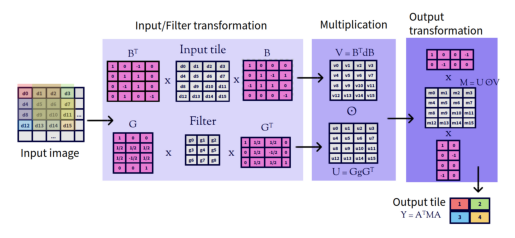

Figure 1. Winograd’s convolution in two dimensional case.


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

image_url1 = "https://www.mdpi.com/mathematics/mathematics-09-02033/article_deploy/html/images/mathematics-09-02033-g002.png"
response1 = requests.get(image_url1)
img1 = Image.open(BytesIO(response1.content))
img_array1 = np.array(img1)

plt.imshow(img_array1)
plt.axis('off')
plt.show()
print("Figure 1. Winograd’s convolution in two dimensional case.")

**Winograd's Algorithm:**

Winograd's algorithm, is another algorithmic improvement over standard matrix multiplication and Strassen's algorithm. Like Strassen's algorithm, Winograd's algorithm aims to reduce the number of arithmetic operations required for matrix multiplication.

This section provides further details of the implementation of the Winograd algorithm. At the top level, the algorithm starts with an input matrix, which is divided into tiles of 𝛼×𝛼 elements. Then, these tiles are processed separately. In fact, the processing of different tiles can take place in parallel and this is an important source of parallelism. The processing of each tile is done using the formulas, making space for the following sequence of four steps.
1. Filter transformation
2. Input transformation
3. Multiplication
4. Output transformation

Winograd's algorithm applies certain mathematical transformations to the input matrices and intermediate results to simplify the multiplication process, achieving a further reduction in the number of arithmetic multiplications compared to Strassen's algorithm. It accomplishes this by decomposing the traditional matrix multiplication operation into smaller sub-operations that require fewer multiplications.In the meantime, Winograd's algorithm precomputes certain intermediate values that can be reused across multiple multiplications. By leveraging these precomputed values, the algorithm reduces redundant computations and achieves better computational efficiency.